# Interpolate raster data

In [16]:
import geoengine as ge

from datetime import datetime
import matplotlib.pyplot as plt

In [17]:
ge.initialize("http://localhost:3030")

In [18]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          18fec623-6600-41af-b82b-24ccf47cb9f9

## Define workflows

In [19]:
workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": {
                "type": "internal",
                "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
            }
        }
    }
})
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

In [20]:
workflow_interpolation = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "Interpolation",
        "params": {
            "interpolation": "biLinear",
            "inputResolution": {
                "type": "native"
            }
        },
        "sources": {
            "raster": {
                "type": "GdalSource",
                "params": {
                    "data": {
                        "type": "internal",
                        "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                    }
                }
            }
        }
    }
})

workflow_interpolation

1b5bfc3f-c17d-5cf5-af88-d87e8e409777

## Query the data

In [34]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

bbox = [43.59375,5.625,45,7.03125]

size = [32, 32]

resolution = [(bbox[2] - bbox[0]) / size[0], (bbox[3] - bbox[1]) / size[1]]

data = workflow.get_xarray(
    ge.QueryRectangle(
        bbox,
        [time, time],
        resolution=resolution,
        )
)

data_interpolation = workflow_interpolation.get_xarray(
    ge.QueryRectangle(
        bbox,
        [time, time],
        resolution=resolution,
        )
)

## Plot the data

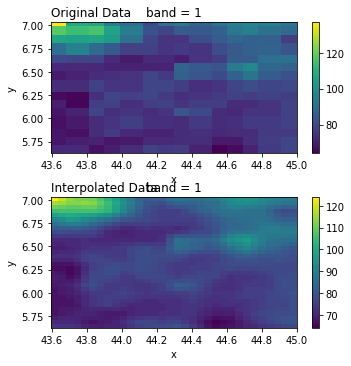

In [45]:
figure, axis = plt.subplots(nrows=2, figsize=(10,10))
axis[0].set_title('Original Data', loc='left')
axis[1].set_title('Interpolated Data', loc='left')

plt.tight_layout()
data.plot(ax=axis[0])
data_interpolation.plot(ax=axis[1])
